# Analyse bilbiométrie "sleepiness" OR "sleepy"

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
# nom des termes d'interêt
list_terms_neurophy = ["EEG", "ERP", "Nervous system", "MRI", "Heart Rate Variability","Neurophysiology", "Psychophysiology" ]
list_terms_majority = ["OSAS", "EDS", "ESS", "CPAP", "AHI", "Sleep Quality", "PSG","Insomnia", "QoL", "PD"]# "PSQI", "BMI","SDB"]
list_terms = np.concatenate((list_terms_neurophy, list_terms_majority))

## Nombre d'article / année

In [10]:
nbarticles = pd.read_csv("../csv/articles_per_year.csv")
nbarticles = nbarticles.iloc[:,1:3]
nbarticles.columns = ['Year', 'Freq']
nbarticles.head()

,Year,Freq
0,1903,1
1,1946,2
2,1948,2
3,1951,1
4,1956,1


In [11]:
# calcule du nb d'article cumulé
nbarticles_cumul = nbarticles.copy()
nbarticles_cumul['Freq'] = nbarticles_cumul['Freq'].cumsum(axis = 0)
nbarticles_cumul.head()

,Year,Freq
0,1903,1
1,1946,3
2,1948,5
3,1951,6
4,1956,7


c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.70588235294117

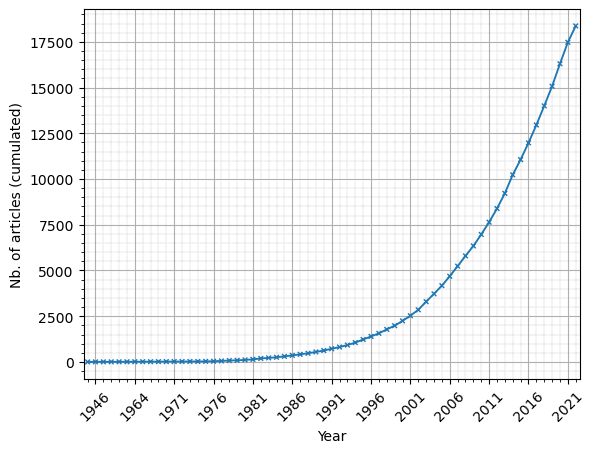

In [12]:
fig, ax = plt.subplots()
g = sns.pointplot(data=nbarticles_cumul, x="Year", y="Freq", markers = "x",scale = 0.5)
#plt.yscale('log')
years = np.unique(nbarticles.Year)
ticks = list(np.arange(1,len(years),5))
g.set_xticks(ticks)
g.set_xticklabels(years[ticks])
plt.xticks(rotation=45)
plt.ylabel("Nb. of articles (cumulated)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='grey')
plt.grid() 
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()


## Analyse des occurrences cumulées

In [13]:
# import des data
df = pd.read_csv("../csv/occurrences_cumulees_trigrams.csv") # genere à partir des scripts 1 et keyword_x_year
df.rename(columns={df.columns[0]: "Keyword"}, inplace = True)
# on met la premiere colonne en étiquettes
df = df.set_index("Keyword")

#df= df.astype(int)# on convertit tout en nombres
df.head(10)

,1969,1972,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Keyword,,,,,,,,,,,,,,,,,,,,,
0.001 0.001 0.001,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,7
0.001 apnea index,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,4,4,5,6,6
0.001 body mass,0,0,0,0,0,0,0,0,0,0,...,4,6,6,7,7,8,8,8,9,9
0.001 compared controls,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,4,5,6,6,6
0.001 depression 0.001,0,0,0,0,0,0,0,0,0,0,...,2,2,3,4,4,4,4,5,6,6
0.001 depressive symptoms,0,0,0,0,0,0,0,0,0,0,...,1,2,2,4,4,4,5,6,6,8
0.001 desaturation index,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,5,5,5,7
0.001 elementary school,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,2
0.001 excessive daytime,0,0,0,0,0,0,0,0,0,0,...,3,4,4,5,5,6,6,9,10,10


### Extraction des termes d'interêt

In [14]:
df_interet = df.loc[list_terms,:] #on ne garde que les termes d'interêt
df_interet.head()

KeyError: "['Heart Rate Variability'] not in index"

### Année de première apparition de chaque terme 

In [15]:
for i in range(len(list_terms)):
    print(df_interet.index[i], " : ", df.columns[np.argmax(df_interet.iloc[i,:]>0)])

NameError: name 'df_interet' is not defined

### Plot 

In [ ]:
# on change la dimension du dataset pour mettre les années en colonne
df_melted = pd.melt(df_interet.reset_index(), id_vars = 'Keyword', var_name = "Year", value_name='Nb. occurrences')
df_melted.Year = df_melted.Year.astype(int) 
# we add the group
df_melted["Group"] = ""
df_melted.loc[np.isin(df_melted.Keyword, list_terms_neurophy),"Group"] = "Neurophy."
df_melted.loc[np.isin(df_melted.Keyword, list_terms_majority),"Group"] = "Major"

df_melted.head()
display(df_melted)

,Keyword,Year,Nb. occurrences,Group
0,Neurophysiology,1969,0,Neurophy.
1,Psychophysiology,1969,0,Neurophy.
2,ERP,1969,0,Neurophy.
3,Nervous system,1969,0,Neurophy.
4,EEG,1969,1,Neurophy.
...,...,...,...,...
760,AHI,2022,2684,Major
761,Sleep Quality,2022,2980,Major
762,PSG,2022,3601,Major
763,Insomnia,2022,2287,Major


In [ ]:
# on merge sur les années
df_melted = df_melted.merge(nbarticles_cumul)
df_melted.tail(15)

,Keyword,Year,Nb. occurrences,Group,Freq
750,Neurophysiology,2022,119,Neurophy.,18370
751,Psychophysiology,2022,63,Neurophy.,18370
752,ERP,2022,96,Neurophy.,18370
753,Nervous system,2022,360,Neurophy.,18370
754,EEG,2022,817,Neurophy.,18370
755,MRI,2022,311,Neurophy.,18370
756,OSAS,2022,6171,Major,18370
757,EDS,2022,8973,Major,18370
758,ESS,2022,5737,Major,18370
759,CPAP,2022,1916,Major,18370


In [ ]:

# on calcule les fréquences
df_melted['Nb. occurrences'] /= df_melted['Freq']*0.01
max(df_melted['Nb. occurrences'])

# on enlève toutes les données avant la première apparition des keywords
df_melted = df_melted[df_melted.Year>=1969]

In [ ]:
palette = sns.color_palette("tab10")
palette_decalee =palette[len(list_terms_neurophy):len(palette)]+palette[0:len(list_terms_neurophy)]

c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may 

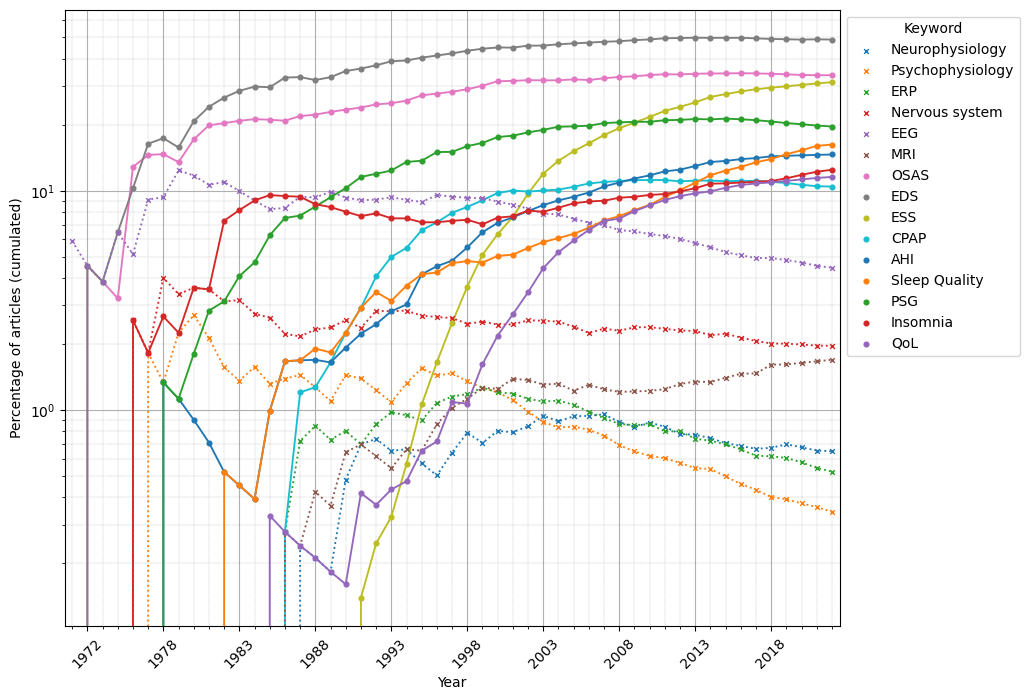

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.figure(figsize=(8,5))

g = sns.pointplot(data=df_melted[df_melted.Group == "Neurophy."], x="Year", y="Nb. occurrences", hue = "Keyword", markers = "x",linestyles = "dotted",scale = 0.5, palette = palette)
g = sns.pointplot(data=df_melted[df_melted.Group == "Major"], x="Year", y="Nb. occurrences", hue = "Keyword", markers = "o",scale = 0.5, palette=palette_decalee)

plt.yscale('log')
years = np.unique(df_melted.Year)
ticks = list(np.arange(1,len(years),5))
g.set_xticks(ticks)
g.set_xticklabels(years[ticks])
plt.xticks(rotation=45)
plt.ylabel("Percentage of articles (cumulated)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='grey')
plt.grid() 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()


## Rang

In [ ]:
df_rank = df_interet.copy()
for annee in df_rank.columns : 
    for keyword in df_rank.index :
        if int(annee) < int(df.columns[np.argmax(df_interet.loc[keyword,:]>0)]) : 
            df_rank.loc[keyword, annee] = np.nan
        else :
            df_rank.loc[keyword, annee] = list(df.sort_values(by=annee, ascending =False).reset_index()['Keyword']).index(keyword)+1 
# on enleve les valeurs avant la premiere apparition
df_rank.head()

,1969,1972,1974,1975,1976,1977,1978,1979,1980,1981,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Keyword,,,,,,,,,,,,,,,,,,,,,
Neurophysiology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53,54,59,61,61,58,55,57,58,56
Psychophysiology,NaN,NaN,NaN,NaN,NaN,25.0,48.0,11.0,11.0,17.0,...,81,85,92,109,119,130,136,143,154,167
ERP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57,58,61,62,65,64,66,70,79,90
Nervous system,NaN,NaN,NaN,NaN,7.0,10.0,8.0,10.0,10.0,11.0,...,27,27,27,28,29,30,30,30,31,31
EEG,1.0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,18,18,18,21,21,21,21,21,21,21


c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may 

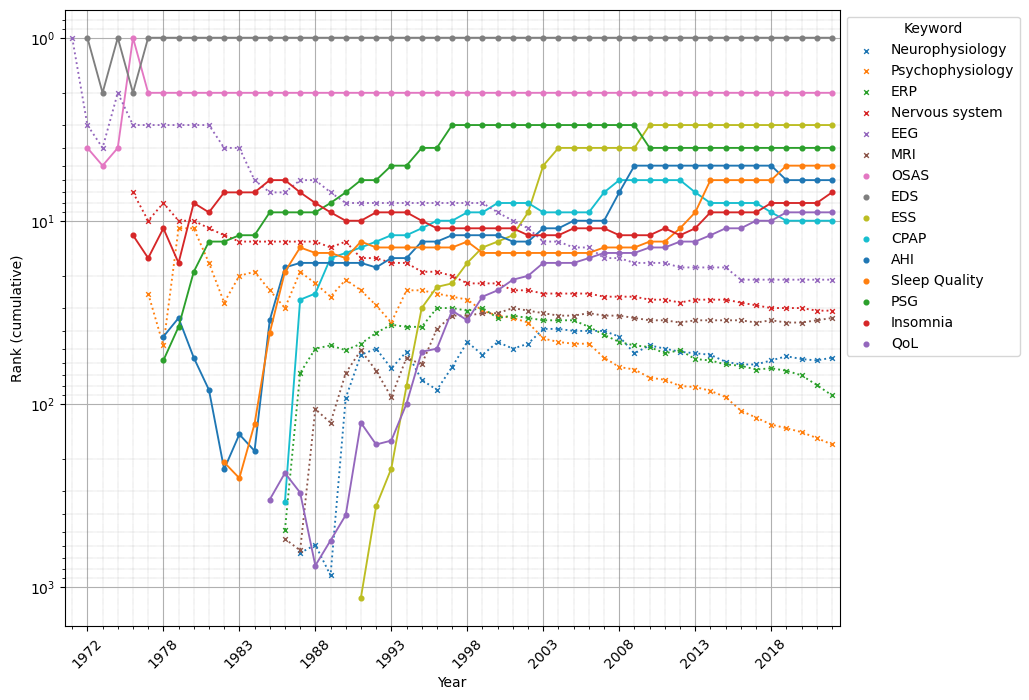

In [ ]:
# on change la dimension du dataset pour mettre les années en colonne
df_melted = pd.melt(df_rank.reset_index(), id_vars = 'Keyword', var_name = "Year", value_name='Rank')
df_melted.Year = df_melted.Year.astype(int) 
# on enlève toutes les données avant la première apparition des keywords
df_melted = df_melted[df_melted.Year>=1969]

# we add the group
df_melted["Group"] = ""
df_melted.loc[np.isin(df_melted.Keyword, list_terms_neurophy),"Group"] = "Neurophy."
df_melted.loc[np.isin(df_melted.Keyword, list_terms_majority),"Group"] = "Major"


fig, ax = plt.subplots(figsize=(10,8))
#plt.figure(figsize=(8,5))

g = sns.pointplot(data=df_melted[df_melted.Group == "Neurophy."], x="Year", y="Rank", hue = "Keyword", markers = "x",linestyles = "dotted",scale = 0.5, palette = palette)
g = sns.pointplot(data=df_melted[df_melted.Group == "Major"], x="Year", y="Rank", hue = "Keyword", markers = "o",scale = 0.5, palette = palette_decalee)

plt.yscale('log')
years = np.unique(df_melted.Year)
ticks = list(np.arange(1,len(years),5))
g.set_xticks(ticks)
g.set_xticklabels(years[ticks])
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.ylabel("Rank (cumulative)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='grey')
plt.grid() 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
